In [1]:
import numpy as np
from scipy.fft import fft
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [82]:
N = 10
channels = 2048
n = 20
length = 8192
sample_rate = 16 * 196.608e-6
time = np.arange(length*N) * sample_rate
freq = 2 * np.fft.fftfreq(length*N, sample_rate)
channel = (0.25 * np.arange(channels) / channels + 1.25)
signal = np.zeros((length*N, channels))
for i in range(N):
    # load file
    num = str(i+1).zfill(3)
    filename = "./M31_P27_N3_tracking-M01_0" + num + ".npz"
    signal[length*i:length*(i+1), :] = np.load(filename)['arr_0'][:, 2048:4096]

In [80]:
N = 10
channels = 4096
n = 20
length = 8192
sample_rate = 16 * 196.608e-6
time = np.arange(length*N) * sample_rate
freq = 2 * np.fft.fftfreq(length*N, sample_rate)
channel = (0.5 * np.arange(channels) / channels + 1)
signal = np.zeros((length*N, channels))
for i in range(N):
    # load file
    num = str(i+1).zfill(3)
    filename = "./M31_P27_N3_tracking-M01_0" + num + ".npz"
    signal[length*i:length*(i+1), :] = np.load(filename)['arr_0']

In [44]:
signal = np.zeros((length*N, channels))
for i in range(N):
    # load file
    num = str(i+1).zfill(3)
    filename = "./M31_P27_N3_tracking-M01_0" + num + ".npz"
    signal[length*i:length*(i+1), :] = np.load(filename)['arr_0'][:, 2048:4096]

In [45]:
pca = PCA(n_components=20)
pca_signal = pca.fit_transform(signal)

In [46]:
pca_signal.shape

(81920, 20)

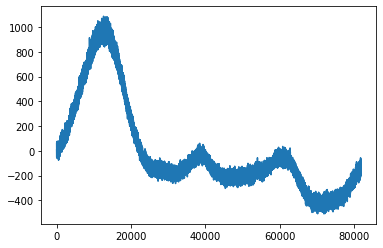

In [47]:
plt.plot(pca_signal[:, 0])

In [74]:
mean = np.mean(signal, axis=0)
data = signal - mean  # regularized data
covariance = np.dot(data.T, data)  # cov-matrix
eig_value, eig_vector = np.linalg.eig(covariance)
index = np.argsort(-eig_value)
base = eig_vector.T[:n]  # selected bases
component = np.dot(base, data.T)  # components
content = (eig_value[index] / np.sum(eig_value))[:n]  # contents
spectrum_component = np.log(np.abs(np.fft.fft(component)).T[freq > 0]/length).T

In [49]:
content

array([0.07028943, 0.02851915, 0.0188852 , 0.01600955, 0.01104515,
       0.00795979, 0.00723735, 0.00640564, 0.00480188, 0.00323543,
       0.00267447, 0.00245982, 0.00193424, 0.00185369, 0.00164346,
       0.00147705, 0.00142357, 0.00131555, 0.0012217 , 0.00116156])

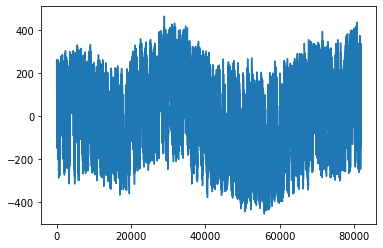

In [72]:
plt.plot(component[3])
plt.savefig("000.png",dpi=200)

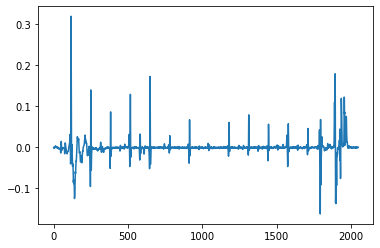

In [75]:
plt.plot(base[5])

In [83]:
for j in range(n):
    grid = plt.GridSpec(8, 8)
    fig = plt.figure(num=1, dpi=100, figsize=(12, 12), facecolor="w", edgecolor="w")
    fig.suptitle("Component" + str(j+1).zfill(2) + f" (content:{content[j] * 100}%) ")
    ax_component = fig.add_subplot(grid[0:2, :])
    ax_base = fig.add_subplot(grid[6:8, :])
    ax_spectrum = fig.add_subplot(grid[3:5, :])
    ax_component.set_title("Signal")
    ax_component.set_xlabel("Time")
    ax_component.plot(time, component[j])
    ax_base.set_title("Base")
    ax_base.set_xlabel("Channel")
    ax_base.scatter(channel, base[j])
    ax_spectrum.set_title("Spectrum")
    ax_spectrum.set_xlabel("Frequency")
    ax_spectrum.plot(freq[freq > 0], spectrum_component[j])
    plt.savefig("filteredbychannel" + str(j+1).zfill(2) + ".png")
    plt.close(fig=fig)

In [77]:
channel

array([], dtype=float64)

In [90]:
fft_amplitude = np.abs(np.fft.fft(signal.T))/(length*N)
spectrum = np.log(fft_amplitude.T[freq > 0])

In [105]:
fft_filtered = np.append(fft_amplitude[:, round(0.01*length*N):round(0.49*length*N)], fft_amplitude[:, round(0.51*length*N):round(0.99*length*N)], axis=1)

In [108]:
signal_recover = np.abs(np.fft.ifft(fft_filtered))

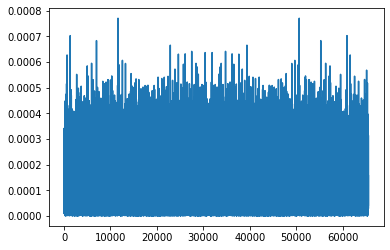

In [114]:
plt.plot(signal_recover[0, round(0.10*length*N):round(0.90*length*N)])

In [86]:
mean = np.mean(spectrum, axis=0)
data = spectrum - mean  # regularized data
covariance = np.dot(data.T, data)  # cov-matrix
eig_value, eig_vector = np.linalg.eig(covariance)
index = np.argsort(-eig_value)
base = eig_vector.T[:n]  # selected bases
component = np.dot(base, data.T)  # components
content = (eig_value[index] / np.sum(eig_value))[:n]  # contents
signal_component = np.abs(np.fft.ifft(np.exp(component)*length))

ValueError: x and y must have same first dimension, but have shapes (81920,) and (40959,)

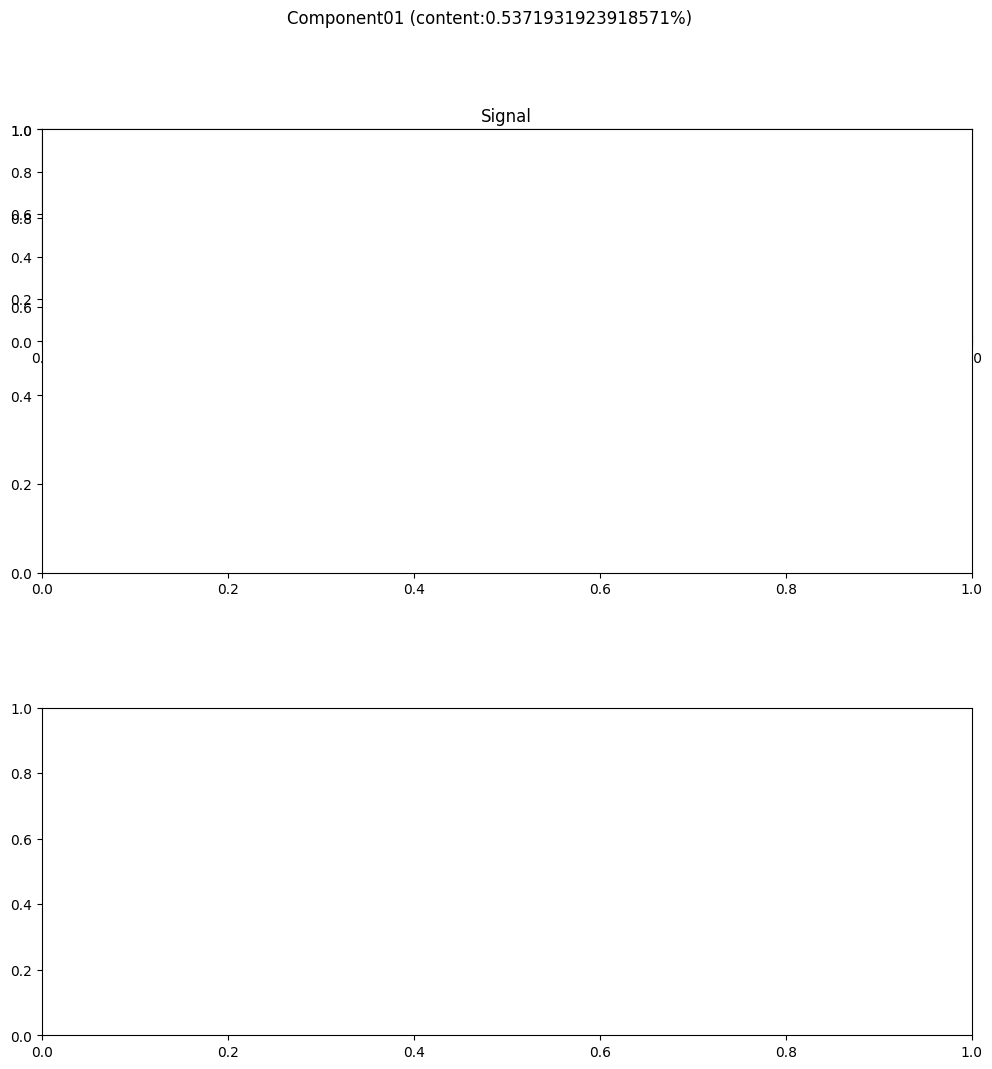

In [89]:
for j in range(n):
    grid = plt.GridSpec(8, 8)
    fig = plt.figure(num=1, dpi=100, figsize=(12, 12), facecolor="w", edgecolor="w")
    fig.suptitle("Component" + str(j+1).zfill(2) + f" (content:{content[j] * 100}%) ")
    # ax_component = fig.add_subplot(grid[0:2, :])
    ax_base = fig.add_subplot(grid[5:8, :])
    ax_spectrum = fig.add_subplot(grid[0:4, :])
    # ax_component.set_title("Signal")
    # ax_component.set_xlabel("Time")
    # ax_component.plot(time, signal_component[j])
    ax_base.set_title("Base", fontdict={"fontsize":18})
    ax_base.set_xlabel("Channel(GHz)", fontdict={"fontsize":16})
    ax_base.scatter(channel, base[j])
    ax_spectrum.set_title("Spectrum", fontdict={"fontsize":18})
    ax_spectrum.set_xlabel("Frequency(Hz)", fontdict={"fontsize":16})
    ax_spectrum.plot(freq[freq > 0], component[j])
    plt.savefig("spectrum" + str(j+1).zfill(2) + ".png")
    plt.close(fig=fig)